<a href="https://colab.research.google.com/github/rehann888/Image-Classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!unzip "/content/drive/My Drive/rockpaperscissors.zip" -d "/content/dataset"

data_dir =  "/content/dataset/rockpaperscissors/rps-cv-images"

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: /content/dataset/__MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: /content/dataset/rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: /content/dataset/__MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: /content/dataset/rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: /content/dataset/__MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: /content/dataset/rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: /content/dataset/__MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: /content/dataset/rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: /content/dataset/__MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: /content/dataset/rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: /

In [ ]:
# Image augmentation and split dataset with ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    vertical_flip=True,
                    horizontal_flip=True,
                    fill_mode = 'nearest',
                    validation_split=0.4)

In [ ]:
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    validation_split=0.4)

In [ ]:
# Labeling image according to its respective folder
train_generator = train_datagen.flow_from_directory(
        data_dir,
        target_size=(90, 135),
        batch_size=32,
        class_mode='categorical',
        subset = 'training')

Found 1314 images belonging to 3 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
        data_dir,
        target_size=(90, 135),
        batch_size=32,
        class_mode='categorical',
        subset='validation')

train_generator.class_indices.keys()

Found 874 images belonging to 3 classes.


dict_keys(['paper', 'rock', 'scissors'])

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, optimizers

# Build sequential model
model=keras.Sequential()
# Add first convolutional layer and pooling layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(90, 135, 3)))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Add second convolutional layer and pooling layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Add third convolutional layer dan pooling layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Add dropout layer to prevent overfitting
model.add(layers.Dropout(0.25))
# Add flatten layer
model.add(layers.Flatten())
# Add dropout layer and fully connected layer
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 88, 133, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 44, 66, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 21, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 30, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 9, 15, 128)        0

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
# Using callback to stop training if accuracy reaches 97.5%
class stop_training(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy') >= 0.95):
      print('Stop training, accuracy reaches 88%')
      self.model.stop_training = True

In [ ]:
stop_training = stop_training()

In [ ]:
# Train the model
model.fit(train_generator,
          steps_per_epoch=32,
          epochs=100,
          callbacks = [stop_training],
          validation_data=validation_generator,
          validation_steps=8,
          verbose=2)

Epoch 1/100
32/32 - 37s - loss: 1.0820 - accuracy: 0.4072 - val_loss: 0.9650 - val_accuracy: 0.5273 - 37s/epoch - 1s/step
Epoch 2/100
32/32 - 35s - loss: 0.9543 - accuracy: 0.5596 - val_loss: 0.6455 - val_accuracy: 0.7773 - 35s/epoch - 1s/step
Epoch 3/100
32/32 - 32s - loss: 0.6933 - accuracy: 0.7295 - val_loss: 0.3593 - val_accuracy: 0.8789 - 32s/epoch - 1s/step
Epoch 4/100
32/32 - 35s - loss: 0.5170 - accuracy: 0.8038 - val_loss: 0.2907 - val_accuracy: 0.9453 - 35s/epoch - 1s/step
Epoch 5/100
32/32 - 31s - loss: 0.4556 - accuracy: 0.8320 - val_loss: 0.3623 - val_accuracy: 0.8125 - 31s/epoch - 984ms/step
Epoch 6/100
32/32 - 36s - loss: 0.4092 - accuracy: 0.8633 - val_loss: 0.1731 - val_accuracy: 0.9531 - 36s/epoch - 1s/step
Epoch 7/100
32/32 - 31s - loss: 0.3523 - accuracy: 0.8753 - val_loss: 0.1759 - val_accuracy: 0.9414 - 31s/epoch - 970ms/step
Epoch 8/100
32/32 - 32s - loss: 0.3783 - accuracy: 0.8571 - val_loss: 0.1305 - val_accuracy: 0.9531 - 32s/epoch - 1s/step
Epoch 9/100
32/32 

<function matplotlib.pyplot.show(close=None, block=None)>

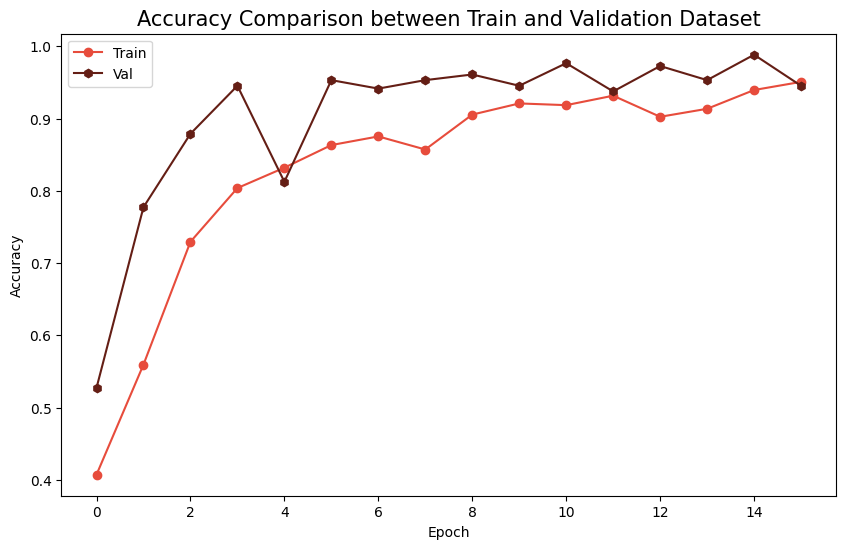

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy comparison
plt.figure(figsize=(10,6))
plt.plot(model.history.history['accuracy'],color="#E74C3C",marker='o')
plt.plot(model.history.history['val_accuracy'],color="#641E15",marker='h')
plt.title('Accuracy Comparison between Train and Validation Dataset',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

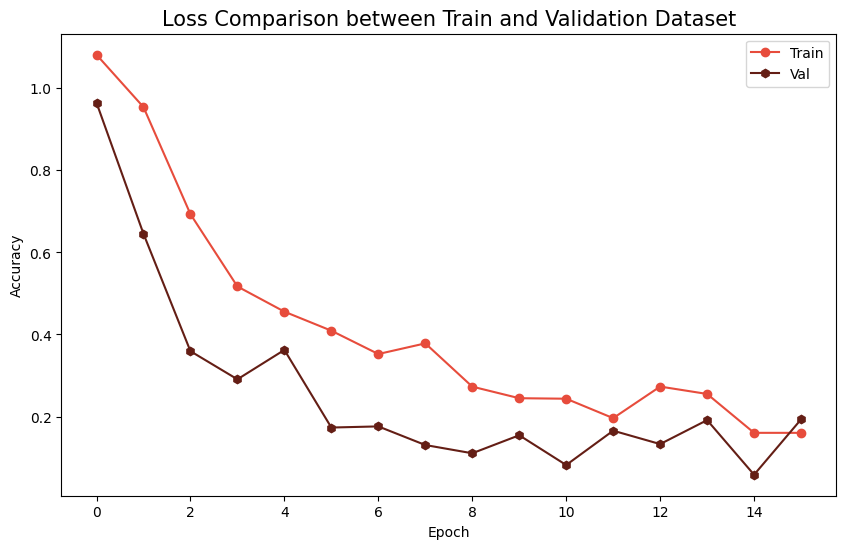

In [ ]:
# Plot loss comparison
plt.figure(figsize=(10,6))
plt.plot(model.history.history['loss'],color="#E74C3C",marker='o')
plt.plot(model.history.history['val_loss'],color="#641E15",marker='h')
plt.title('Loss Comparison between Train and Validation Dataset',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show


Saving zz1yffW197uYO6DI.png to zz1yffW197uYO6DI.png
1/1 [==============================] - 0s 49ms/step
The predicted class for the uploaded image is: paper


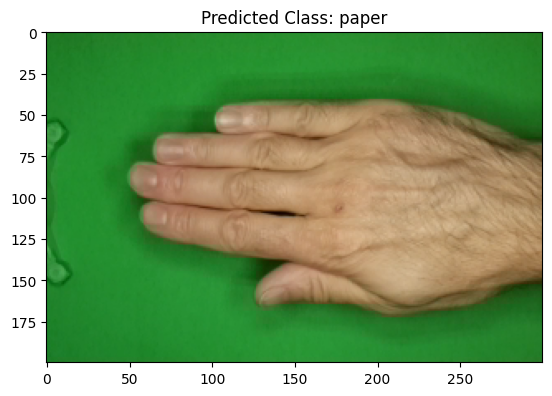

In [ ]:
# Import necessary modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import drive

# Function to predict uploaded image
def predict_image(image_path, model):
    img = load_img(image_path, target_size=(90, 135))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    predictions = model.predict(img_array)
    class_indices = train_generator.class_indices
    class_labels = list(class_indices.keys())
    predicted_class = class_labels[np.argmax(predictions)]

    return predicted_class

# Upload image
uploaded = files.upload()

for fn in uploaded.keys():
    # Predict the class of the uploaded image
    image_path = fn
    predicted_class = predict_image(image_path, model)
    print(f'The predicted class for the uploaded image is: {predicted_class}')

    # Display the uploaded image
    img = load_img(image_path)
    plt.imshow(img)
    plt.title(f'Predicted Class: {predicted_class}')
    plt.show()